In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# Novas unidades de produção para Autoconsumo
drive.mount('/content/drive')
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/tese/26-centrais.parquet')
print(df.head())

Mounted at /content/drive
    ano semestre             concelho  potencia_de_ligacao  \
0  2021        2           Cantanhede               431.05   
1  2021        2  Cabeceiras de Basto                34.79   
2  2021        2            Guimarães              1331.24   
3  2021        2            Aljustrel                47.54   
4  2021        2             Grândola                69.74   

   processos_concluidos codconcelho  
0                 118.0        0602  
1                  20.0        0304  
2                 552.0        0308  
3                  20.0        0201  
4                  34.0        1505  


In [3]:
df['time'] = df['ano'] + '-' + df['semestre']

In [4]:
df

,ano,semestre,concelho,potencia_de_ligacao,processos_concluidos,codconcelho,time
0,2021,2,Cantanhede,431.05,118.0,0602,2021-2
1,2021,2,Cabeceiras de Basto,34.79,20.0,0304,2021-2
2,2021,2,Guimarães,1331.24,552.0,0308,2021-2
3,2021,2,Aljustrel,47.54,20.0,0201,2021-2
4,2021,2,Grândola,69.74,34.0,1505,2021-2
...,...,...,...,...,...,...,...
2218,2021,2,Valença,20.73,16.0,1608,2021-2
2219,2021,2,Torres Novas,406.49,104.0,1419,2021-2
2220,2021,2,Penalva do Castelo,81.80,9.0,1811,2021-2
2221,2021,2,Oliveira de Azeméis,404.58,140.0,0113,2021-2


In [5]:
# unique_anos = df['ano'].nunique()

# print(f"There are {unique_anos} unique years in the dataset.")

ano_counts = df.groupby('ano')['ano'].count()
ano_counts

,ano
ano,
2021,278
2022,555
2023,556
2024,556
2025,278


In [6]:
semester_counts = df.groupby(['ano', 'semestre']).size().reset_index(name='count')
semester_counts

,ano,semestre,count
0,2021,2,278
1,2022,1,277
2,2022,2,278
3,2023,1,278
4,2023,2,278
5,2024,1,278
6,2024,2,278
7,2025,1,278


In [7]:
concelho_count = df['concelho'].nunique()

print(f"There are {concelho_count} unique concelhos.")

concelho_counts = df.groupby('concelho')['concelho'].count()

concelho_counts

There are 278 unique concelhos.


,concelho
concelho,
Abrantes,8
Aguiar da Beira,8
Alandroal,8
Albergaria-a-Velha,8
Albufeira,8
...,...
Vouzela,8
Águeda,8
Évora,8


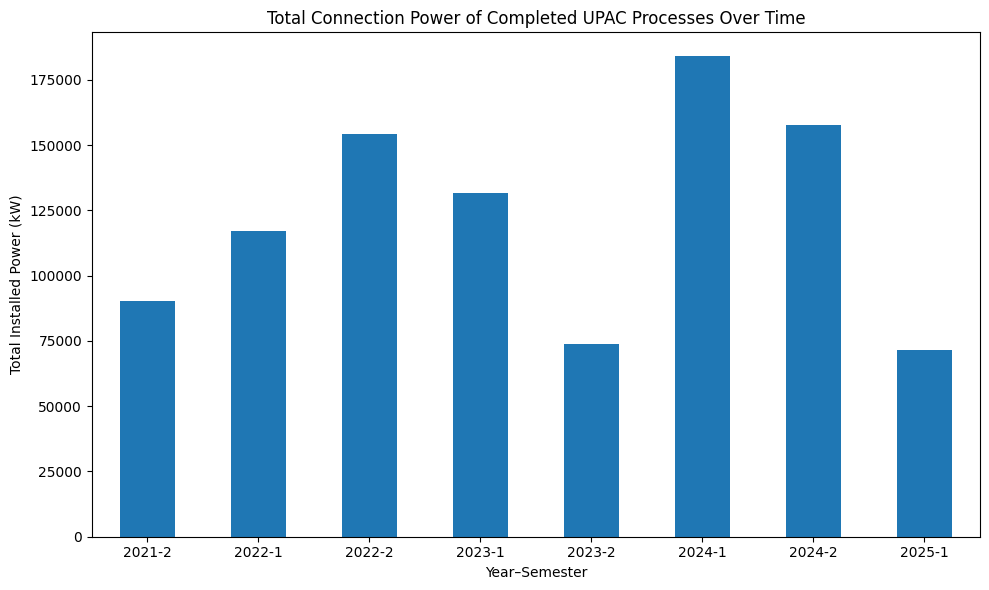

In [8]:
potencia_by_time  = df.groupby('time')['potencia_de_ligacao'].sum()
potencia_by_time.plot(kind='bar', figsize=(10, 6))

plt.title('Total Connection Power of Completed UPAC Processes Over Time')
plt.xlabel('Year–Semester')
plt.ylabel('Total Installed Power (kW)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

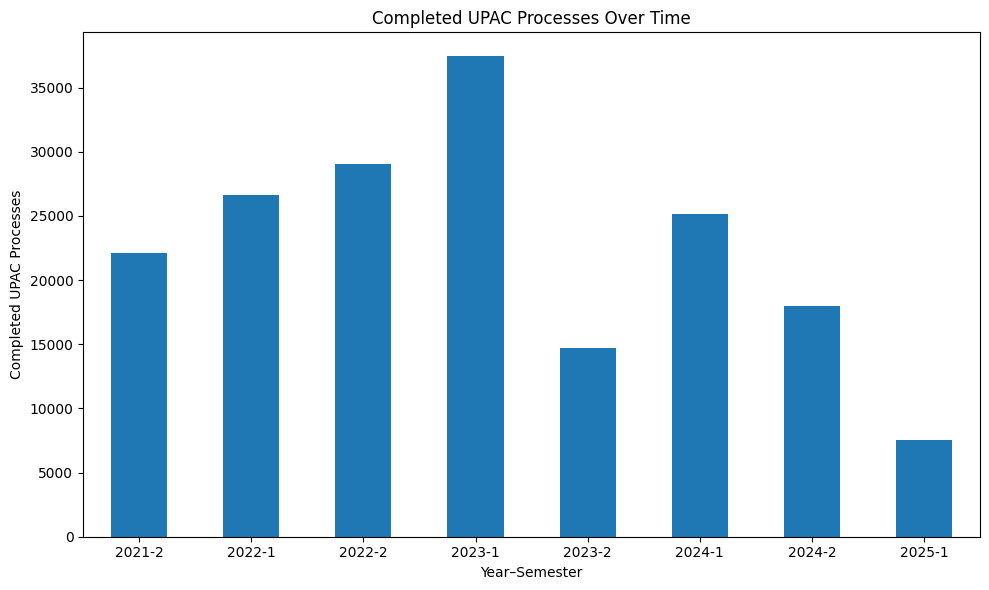

In [9]:
processos_by_time = df.groupby('time')['processos_concluidos'].sum()
processos_by_time.plot(kind='bar', figsize=(10, 6))

plt.title("Completed UPAC Processes Over Time")
plt.xlabel("Year–Semester")
plt.ylabel("Completed UPAC Processes")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [10]:
# prompt: Using dataframe df: help me understand potencia_de_ligacao

# Calculate the descriptive statistics for potencia_de_ligacao
potencia_de_ligacao_stats = df['potencia_de_ligacao'].describe()

# Print the descriptive statistics
print(potencia_de_ligacao_stats)

# Calculate the correlation between potencia_de_ligacao and processos_concluidos
correlation = df['potencia_de_ligacao'].corr(df['processos_concluidos'])

# Print the correlation
print(f"\nCorrelation between potencia_de_ligacao and processos_concluidos: {correlation}")

# You can further explore the relationship by grouping by different variables like ano, semestre, concelho
# and then examining the average or total potencia_de_ligacao for those groups.

# Example: Group by ano and calculate the mean potencia_de_ligacao
mean_potencia_by_year = df.groupby('ano')['potencia_de_ligacao'].mean()
print(f"\nMean potencia_de_ligacao by year:\n{mean_potencia_by_year}")


count    2223.000000
mean      440.940495
std       664.546504
min         0.250000
25%        63.530000
50%       170.960000
75%       527.850000
max      5892.890000
Name: potencia_de_ligacao, dtype: float64

Correlation between potencia_de_ligacao and processos_concluidos: 0.7352522302572984

Mean potencia_de_ligacao by year:
ano
2021    324.392230
2022    488.827423
2023    369.223183
2024    614.794460
2025    257.613849
Name: potencia_de_ligacao, dtype: float64


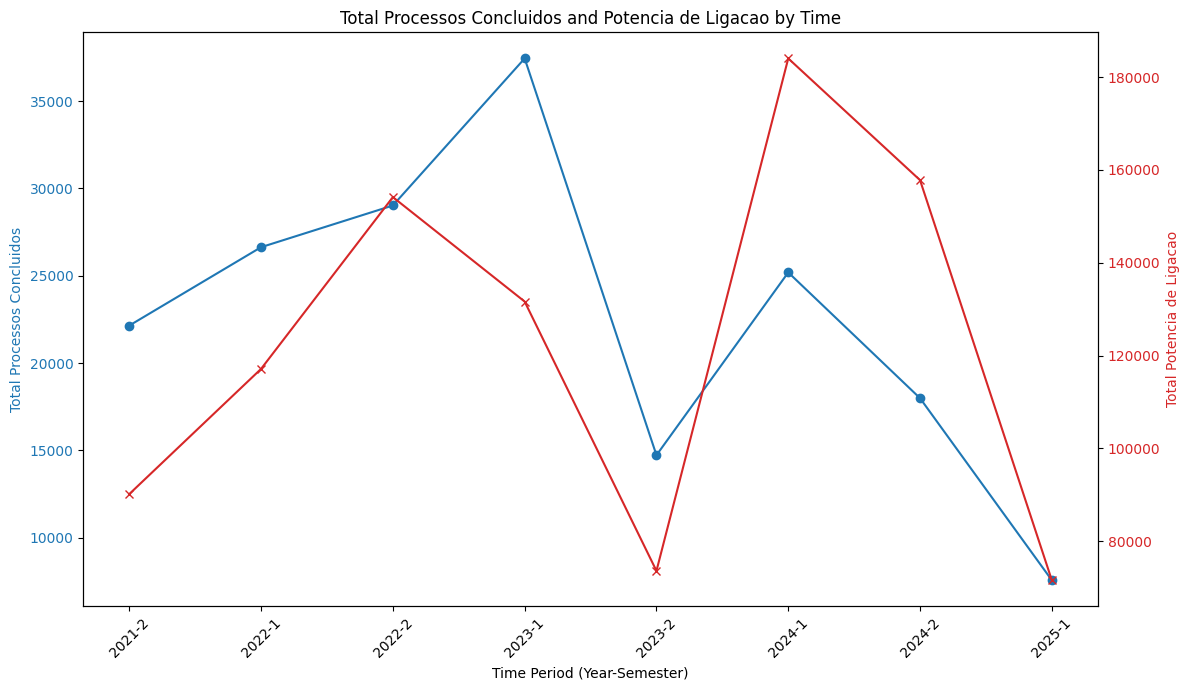

In [11]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot 'processos_concluidos' on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Time Period (Year-Semester)')
ax1.set_ylabel('Total Processos Concluidos', color=color)
ax1.plot(processos_by_time.index, processos_by_time.values, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45) # Rotate x-axis labels

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot 'potencia_de_ligacao' on the second y-axis
color = 'tab:red'
ax2.set_ylabel('Total Potencia de Ligacao', color=color)
ax2.plot(potencia_by_time.index, potencia_by_time.values, color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title to the plot
plt.title('Total Processos Concluidos and Potencia de Ligacao by Time')

# Show the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

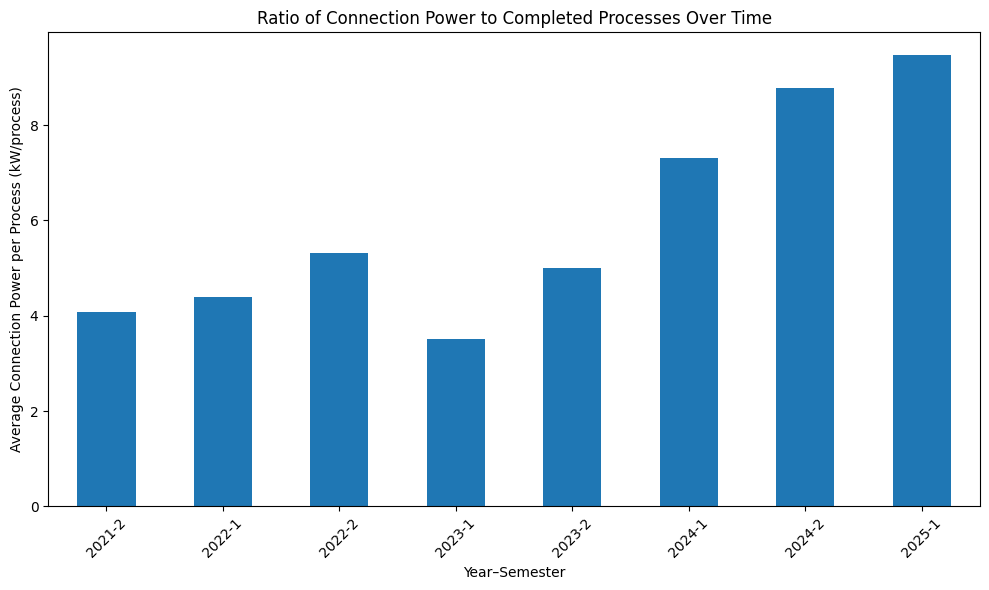

In [12]:
# Calculate the ratio of potencia_de_ligacao to processos_concluidos for each time period
ratio_by_time = potencia_by_time / processos_by_time

# Plot the ratio as a bar graph
ratio_by_time.plot(kind='bar', figsize=(10, 6))

plt.title("Ratio of Connection Power to Completed Processes Over Time")
plt.xlabel("Year–Semester")
plt.ylabel("Average Connection Power per Process (kW/process)")
plt.xticks(rotation=45) # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()